In [21]:

#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
#Importing Data Set
dataset= pd.read_excel('dataregre.xlsx')

In [24]:

# Check for missing data
missing_data = dataset.isnull().sum()

# Display the count of missing values for each column
print(missing_data)


Region                   0
Highrisks                6
NumberOfJobs             6
AutomationProbability    0
dtype: int64


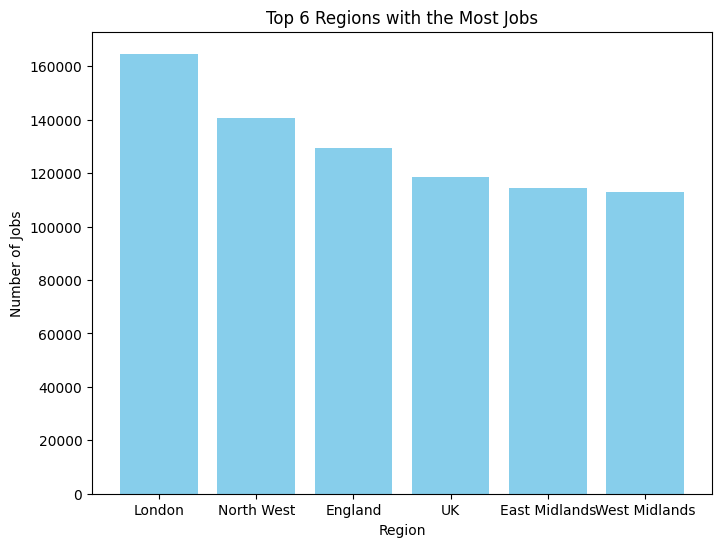

In [25]:
# Create a DataFrame from the data
df = pd.DataFrame(dataset)
# Group the data by 'Region' and calculate the sum of 'NumberOfJobs' for each region
region_jobs = df.groupby('Region')['NumberOfJobs'].sum().reset_index()
# Sort the regions by 'NumberOfJobs' in descending order and select the top 6
top_regions = region_jobs.sort_values(by='NumberOfJobs', ascending=False).head(6)
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(top_regions['Region'], top_regions['NumberOfJobs'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Jobs')
plt.title('Top 6 Regions with the Most Jobs')
plt.show()


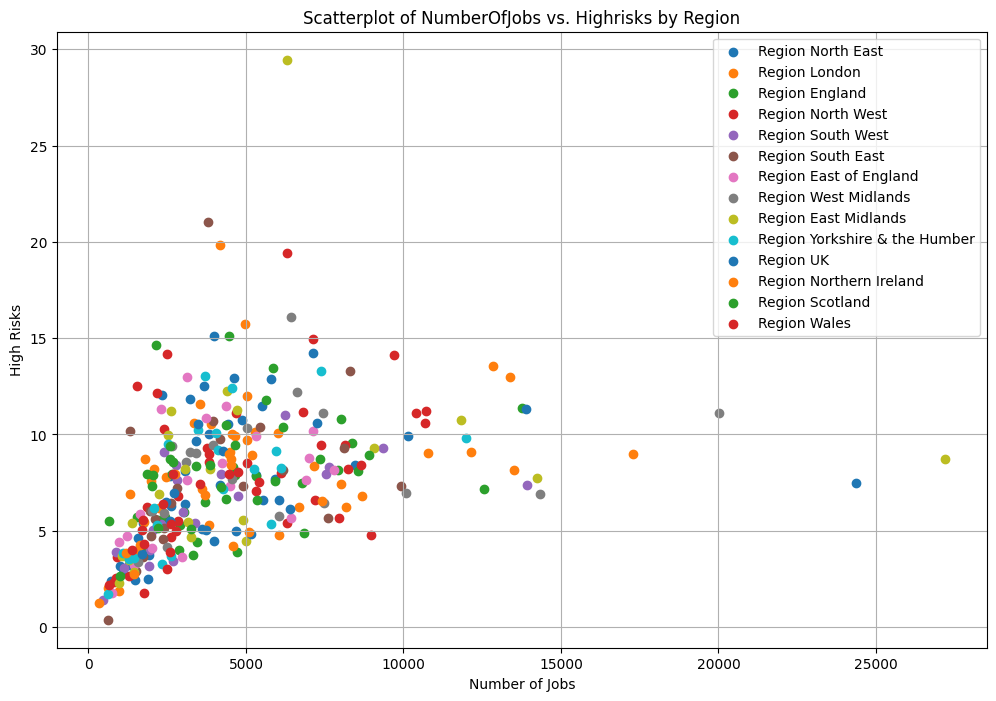

In [26]:
# Create a DataFrame from the data
df = pd.DataFrame(dataset)
# Loop through unique regions and create scatterplots
regions = df['Region'].unique()
plt.figure(figsize=(12, 8))
for region in regions:
    subset = df[df['Region'] == region]
    plt.scatter(subset['NumberOfJobs'], subset['Highrisks'], label=f'Region {region}')
plt.xlabel('Number of Jobs')
plt.ylabel('High Risks')
plt.title('Scatterplot of NumberOfJobs vs. Highrisks by Region')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
#dividing the dataset into explanatory and predicate variables
p = dataset.iloc[:, :-1].values
q = dataset.iloc[:, -1].values

In [28]:
dataset.info

<bound method DataFrame.info of                Region  Highrisks  NumberOfJobs  AutomationProbability
0          North East      11.83        3219.0                   0.50
1          North East      12.89        5806.0                   0.49
2          North East      10.56        4437.0                   0.48
3          North East       7.88        5317.0                   0.45
4          North East      10.02        3833.0                   0.49
..                ...        ...           ...                    ...
320        North East       2.51        1880.0                   0.37
321                UK       4.81        5164.0                   0.39
322  Northern Ireland       4.93        5099.0                   0.41
323          Scotland       4.86        6853.0                   0.33
324             Wales       3.01        2481.0                   0.35

[325 rows x 4 columns]>

In [29]:
#statistical info of the dataset
dataset.describe()

,Highrisks,NumberOfJobs,AutomationProbability
count,319.000000,319.000000,325.000000
mean,7.627555,4583.909091,0.446492
std,3.548596,3546.577192,0.043362
min,0.380000,340.000000,0.330000
25%,5.105000,2217.500000,0.420000
50%,7.560000,3755.000000,0.450000
75%,9.510000,5986.500000,0.480000
max,29.460000,27180.000000,0.570000


In [30]:
cat_cols=dataset.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(dataset[cat_cols].melt(var_name='column', value_name='value')
.value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(dataset.select_dtypes(include=object).describe())
display(cat_df)

,Region
count,325
unique,14
top,North West
freq,30


count
column value                        
Region East Midlands              21
       East of England            21
       Northern Ireland           21
       Scotland                   21
       South East                 21
       South West                 21
       UK                         21
       Wales                      21
       West Midlands              21
       Yorkshire & the Humber     21
       England                    28
       London                     28
       North East                 29
       North West                 30

In [31]:
#Encoding categorical data
from sklearn import preprocessing
dummy_hot = pd.get_dummies(dataset['Region'])

In [32]:
# Join the encoded df
dataset= dataset.join(dummy_hot)
dataset

,Region,Highrisks,NumberOfJobs,AutomationProbability,East Midlands,East of England,England,London,North East,North West,Northern Ireland,Scotland,South East,South West,UK,Wales,West Midlands,Yorkshire & the Humber
0,North East,11.83,3219.0,0.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,North East,12.89,5806.0,0.49,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,North East,10.56,4437.0,0.48,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,North East,7.88,5317.0,0.45,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,North East,10.02,3833.0,0.49,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,North East,2.51,1880.0,0.37,0,0,0,0,1,0,0,0,0,0,0,0,0,0
321,UK,4.81,5164.0,0.39,0,0,0,0,0,0,0,0,0,0,1,0,0,0
322,Northern Ireland,4.93,5099.0,0.41,0,0,0,0,0,0,1,0,0,0,0,0,0,0
323,Scotland,4.86,6853.0,0.33,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [33]:
#Removing columns that are not needed
dataset = dataset.drop({"Region"},axis = 1)

In [34]:
dataset

,Highrisks,NumberOfJobs,AutomationProbability,East Midlands,East of England,England,London,North East,North West,Northern Ireland,Scotland,South East,South West,UK,Wales,West Midlands,Yorkshire & the Humber
0,11.83,3219.0,0.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,12.89,5806.0,0.49,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,10.56,4437.0,0.48,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,7.88,5317.0,0.45,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,10.02,3833.0,0.49,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2.51,1880.0,0.37,0,0,0,0,1,0,0,0,0,0,0,0,0,0
321,4.81,5164.0,0.39,0,0,0,0,0,0,0,0,0,0,1,0,0,0
322,4.93,5099.0,0.41,0,0,0,0,0,0,1,0,0,0,0,0,0,0
323,4.86,6853.0,0.33,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [35]:
# Reordering the column of the dataset


# Rearrange the columns
new_order = ['Highrisks', 'NumberOfJobs', 'East Midlands', 'East of England', 'England', 'London', 'North East', 'North West', 'Northern Ireland', 'Scotland', 'South East', 'South West', 'UK','Wales', 'West Midlands', 'Yorkshire & the Humber', 'AutomationProbability'   ]  # Specify the desired column order
dataset = dataset[new_order]

# Save the rearranged dataset
dataset.to_csv('dataset2.csv', index=False)


In [36]:
#Importing new Data Set (that was re-ordered)
dataset_new= pd.read_csv('dataset2.csv')

In [37]:

# Check for missing data
missing_data = dataset_new.isnull().sum()

# Display the count of missing values for each column
print(missing_data)


Highrisks                 6
NumberOfJobs              6
East Midlands             0
East of England           0
England                   0
London                    0
North East                0
North West                0
Northern Ireland          0
Scotland                  0
South East                0
South West                0
UK                        0
Wales                     0
West Midlands             0
Yorkshire & the Humber    0
AutomationProbability     0
dtype: int64


In [38]:
#dividing the dataset into explanatory and predicate variables
p = dataset_new.iloc[:, :-1].values
q = dataset_new.iloc[:, -1].values

In [39]:
#Dealing with missing data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(p[:, 0:2])
p[:, 0:2] = imputer.transform(p[:, 0:2])

In [40]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
inputScaler_num = MinMaxScaler()
inputScaler_num.fit(p)
p = inputScaler_num.transform(p)
p_norm= pd.DataFrame(p)



In [41]:
p_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.393741,0.107265,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.430193,0.203651,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.350069,0.152645,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.257909,0.185432,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.331499,0.130142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.073246,0.057377,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
321,0.152338,0.179732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
322,0.156465,0.177310,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,0.154058,0.242660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# splitting data training and testing

from sklearn.model_selection import train_test_split

p_norm_train,p_norm_test,q_train,q_test=train_test_split(p_norm,q,test_size=0.20,random_state=42)


In [43]:
p_norm_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
172,0.298831,0.076937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
183,0.281293,0.086848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.267882,0.282228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.172971,0.222429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.350069,0.131706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.223865,0.036662,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.237964,0.062146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.249228,0.158119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
270,0.306396,0.335283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
q_train

array([0.54, 0.48, 0.47, 0.44, 0.47, 0.49, 0.45, 0.43, 0.4 , 0.47, 0.43,
       0.44, 0.39, 0.45, 0.39, 0.45, 0.47, 0.46, 0.46, 0.42, 0.35, 0.39,
       0.5 , 0.38, 0.45, 0.45, 0.44, 0.5 , 0.39, 0.41, 0.46, 0.36, 0.44,
       0.44, 0.48, 0.5 , 0.45, 0.38, 0.42, 0.53, 0.37, 0.46, 0.47, 0.38,
       0.41, 0.49, 0.41, 0.47, 0.43, 0.46, 0.48, 0.46, 0.46, 0.4 , 0.5 ,
       0.43, 0.48, 0.43, 0.48, 0.5 , 0.45, 0.49, 0.45, 0.45, 0.41, 0.46,
       0.44, 0.4 , 0.48, 0.49, 0.5 , 0.43, 0.37, 0.38, 0.49, 0.43, 0.33,
       0.46, 0.44, 0.47, 0.48, 0.52, 0.41, 0.44, 0.42, 0.46, 0.43, 0.52,
       0.41, 0.48, 0.57, 0.43, 0.44, 0.35, 0.37, 0.44, 0.51, 0.51, 0.46,
       0.48, 0.46, 0.44, 0.49, 0.41, 0.41, 0.48, 0.46, 0.45, 0.48, 0.46,
       0.46, 0.47, 0.34, 0.43, 0.43, 0.47, 0.43, 0.41, 0.49, 0.39, 0.49,
       0.46, 0.46, 0.49, 0.43, 0.43, 0.5 , 0.44, 0.35, 0.43, 0.39, 0.42,
       0.46, 0.34, 0.44, 0.41, 0.45, 0.5 , 0.39, 0.45, 0.47, 0.35, 0.47,
       0.43, 0.5 , 0.48, 0.5 , 0.45, 0.52, 0.47, 0.

In [45]:
# Fitting the Decision Treee Model
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(p_norm_train, q_train)

DecisionTreeRegressor(random_state=0)

In [46]:
#Running Predictions
auto_pred_dt = regressor_dt.predict(p_norm_test)


In [47]:
# Fitting Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
regressor_rm = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rm.fit(p_norm_train, q_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [48]:
#Running Predictions(Random forest)
auto_pred_rf = regressor_rm.predict(p_norm_test)


In [49]:
#Fitting Multiple LInear regression model
from sklearn.linear_model import LinearRegression
regressor_mr = LinearRegression()
regressor_mr.fit(p_norm_train, q_train)

LinearRegression()

In [54]:
#Running Predictions(MR)
auto_pred_mr = regressor_mr.predict(p_norm_test)

In [55]:
#Estimating Evaluation Metrics MAE MSE RMSE
from sklearn import metrics
from sklearn.metrics import r2_score
mae_dt= metrics.mean_absolute_error(q_test, auto_pred_dt)
mse_dt= metrics.mean_squared_error(q_test, auto_pred_dt)
rmse_dt= np.sqrt(metrics.mean_squared_error(q_test, auto_pred_dt))
r2score_dt= r2_score(q_test, auto_pred_dt)
print('Mean Absolute Error DT:', mae_dt)
print('Mean Squared Error DT:', mse_dt)
print('Root Mean Squared Error DT:', rmse_dt)

#r2score
print("MULTIPLE LINEAR REGRESSION R2SCORE MR : " ,r2score_dt)

Mean Absolute Error DT: 0.032
Mean Squared Error DT: 0.0018953846153846154
Root Mean Squared Error DT: 0.04353601515279752
MULTIPLE LINEAR REGRESSION R2SCORE MR :  0.009327758121582375


In [57]:
#Estimating Evaluation Metrics MAE MSE RMSE
from sklearn import metrics
from sklearn.metrics import r2_score
mae_rf= metrics.mean_absolute_error(q_test, auto_pred_rf)
mse_rf= metrics.mean_squared_error(q_test, auto_pred_rf)
rmse_rf= np.sqrt(metrics.mean_squared_error(q_test, auto_pred_rf))
r2score_rf= r2_score(q_test, auto_pred_rf)
print('Mean Absolute Error rf:', mae_rf)
print('Mean Squared Error rf:', mse_rf )
print('Root Mean Squared Error rf:', rmse_rf)

#r2score

print("MULTIPLE LINEAR REGRESSION R2SCORE RF : " ,r2score_rf)

Mean Absolute Error rf: 0.027194871794871792
Mean Squared Error rf: 0.0011796324786324782
Root Mean Squared Error rf: 0.03434577817771026
MULTIPLE LINEAR REGRESSION R2SCORE RF :  0.38343429469997514


In [58]:
#Estimating Evaluation Metrics MAE MSE RMSE
from sklearn import metrics
from sklearn.metrics import r2_score
mae_mr= metrics.mean_absolute_error(q_test, auto_pred_mr)
mse_mr= metrics.mean_squared_error(q_test, auto_pred_mr)
rmse_mr= np.sqrt(metrics.mean_squared_error(q_test, auto_pred_mr))
r2score_mr= r2_score(q_test, auto_pred_mr)
print('Mean Absolute Error MR:', mae_mr)
print('Mean Squared Error MR:', mse_mr )
print('Root Mean Squared Error MR:', rmse_mr)

#r2score

print("MULTIPLE LINEAR REGRESSION R2SCORE MR : " ,r2score_mr)

Mean Absolute Error MR: 0.02847626201923077
Mean Squared Error MR: 0.001190120350764348
Root Mean Squared Error MR: 0.03449812097440016
MULTIPLE LINEAR REGRESSION R2SCORE MR :  0.37795253457958644


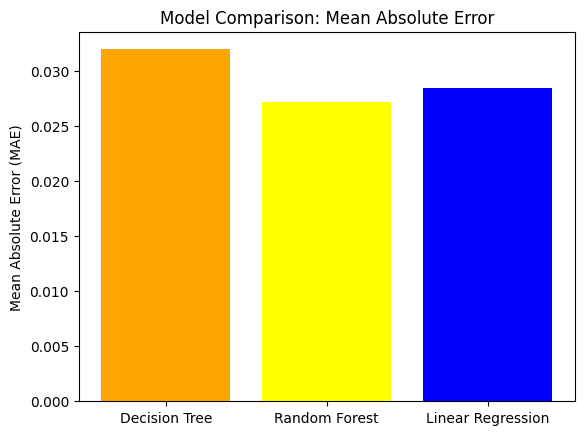

In [59]:

#create a barchart to compare model performance
models = ['Decision Tree', 'Random Forest', 'Linear Regression']
mae_values = [mae_dt, mae_rf, mae_mr]
plt.bar(models, mae_values, color=['orange', 'yellow', 'blue'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison: Mean Absolute Error')
plt.show()


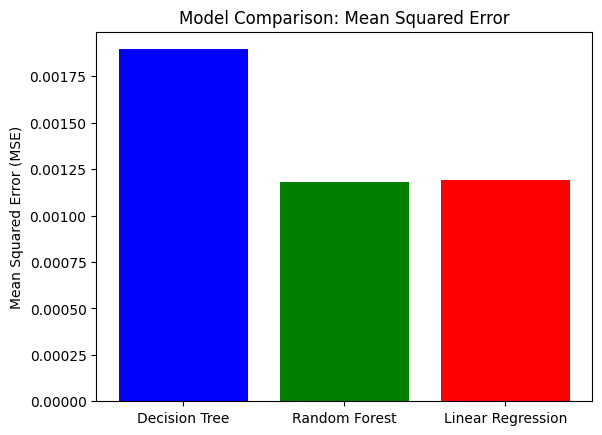

In [60]:
#create a barchart to compare model performance
models = ['Decision Tree', 'Random Forest', 'Linear Regression']
mse_values = [mse_dt, mse_rf, mse_mr]
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison: Mean Squared Error')
plt.show()


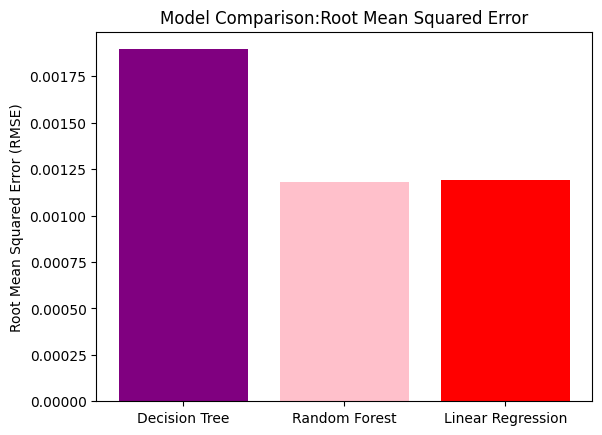

In [61]:
#create a barchart to compare model performance
models = ['Decision Tree', 'Random Forest', 'Linear Regression']
rmse_values = [rmse_dt, rmse_rf, rmse_mr]
plt.bar(models, mse_values, color=['purple', 'pink', 'red'])
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison:Root Mean Squared Error')
plt.show()


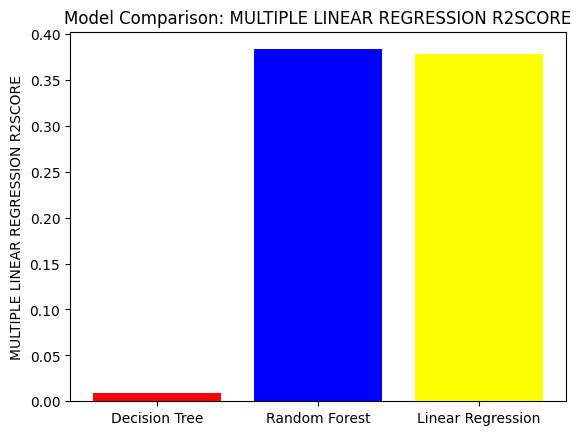

In [62]:
#create a barchart to compare model performance
models = ['Decision Tree', 'Random Forest', 'Linear Regression']
r2score_values = [r2score_dt, r2score_rf, r2score_mr]
plt.bar(models, r2score_values, color=['red', 'blue', 'yellow'])
plt.ylabel('MULTIPLE LINEAR REGRESSION R2SCORE')
plt.title('Model Comparison: MULTIPLE LINEAR REGRESSION R2SCORE')
plt.show()